### MNIST CNN

Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.

From https://raw.githubusercontent.com/keras-team/keras/master/examples/mnist_cnn.py

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from IPython.display import SVG
from helpers import output_folder

TF_LOGS = output_folder('mnist_cnn_keras')
batch_size = 128
num_classes = 10
epochs = 12

tbcb = TensorBoard(log_dir=TF_LOGS, histogram_freq=10, write_graph=True)

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tbcb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 41s 677us/step - loss: 0.2563 - acc: 0.9213 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 39s 643us/step - loss: 0.0889 - acc: 0.9734 - val_loss: 0.0384 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 39s 645us/step - loss: 0.0653 - acc: 0.9802 - val_loss: 0.0350 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 39s 648us/step - loss: 0.0542 - acc: 0.9837 - val_loss: 0.0310 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 39s 649us/step - loss: 0.0466 - acc: 0.9858 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 39s 648us/step - loss: 0.0404 - acc: 0.9877 - val_loss: 0.0279 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 39s 647us/step - loss: 0.0361 - acc: 0.9891 - val_loss: 0.

Test loss: 0.026795091995026086
Test accuracy: 0.9917

TF_LOGS: C:\src\tf-playground\logs\mnist_cnn_keras20180419101742


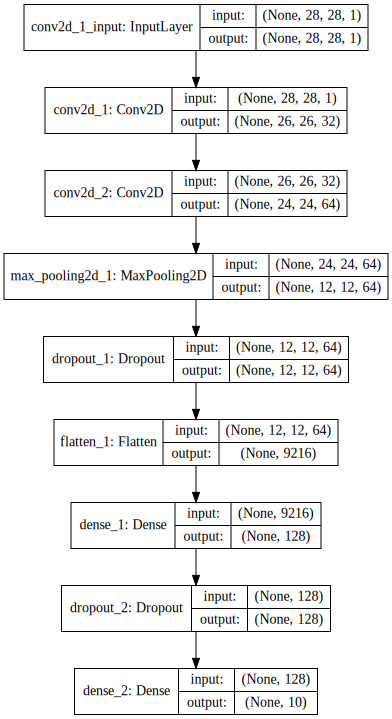

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nTF_LOGS: {}'.format(TF_LOGS))
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))